In [1]:
import pandas as pd
df_amazon = pd.read_csv('C:\\Users\\Rike\\Documents\\git\\Statistics\\lab-eda-univariate\\amz_uk_price_prediction_dataset.csv')

df_amazon


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?


In [2]:
bestsellers_table = pd.crosstab ( df_amazon ['category'], df_amazon['isBestSeller'] )  
bestsellers_table.head(20)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


In [3]:
proportion_bestsellers = (bestsellers_table[True]/(bestsellers_table[False] + bestsellers_table[True]))*100
proportion_bestsellers.sort_values( ascending=False).head(20)

category
Grocery                           5.813467
Smart Home Security & Lighting    5.769231
Health & Personal Care            5.768628
Mobile Phone Accessories          4.247104
Power & Hand Tools                3.533895
Billiard, Snooker & Pool          3.212851
Pet Supplies                      3.020028
Home Brewing & Wine Making        2.845528
Wind Instruments                  2.800000
Mirrors                           2.800000
Professional Medical Supplies     2.734375
PC & Video Games                  2.546634
Bakeware                          2.510460
Material Handling Products        2.500000
Bedding Accessories               2.439024
Tableware                         2.409639
Arts & Crafts                     2.408629
Baby                              2.265781
Lighting                          2.255639
Window Treatments                 2.092050
dtype: float64

In [5]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.


In [4]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(bestsellers_table)

# Round and display the results
chi2_statistic_rounded = chi2_statistic.round(2)
chi2_p_value_rounded = chi2_p_value.round(5)

chi2_statistic_rounded, chi2_p_value_rounded

(36540.2, 0.0)

In [5]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(bestsellers_table, method="cramer")

0.1222829439760564

In [8]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart


In [62]:
print(plt.rcParams['figure.figsize'])  # Check default size

[6.0, 4.0]


In [63]:
plt.rcParams['figure.figsize'] = [14.0, 10.0]  # Change defaultsize

<AxesSubplot:xlabel='category'>

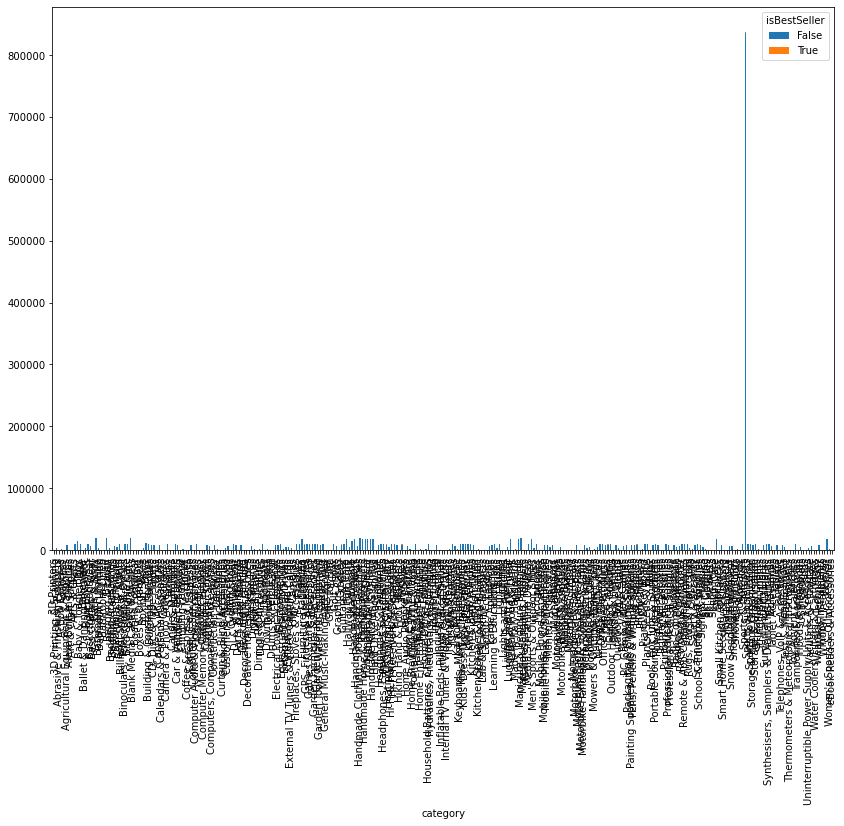

In [64]:
bestsellers_table.plot(kind="bar", stacked=True)

In [10]:
#Investigate how different product categories influence product prices.

# Remove outliers in product prices


In [8]:
Q1 = df_amazon['price'].quantile(0.25)
Q3 = df_amazon['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df_amazon[(df_amazon['price'] >= lower_bound) & (df_amazon['price'] <= upper_bound)]
print(Q1, Q3, IQR, lower_bound, upper_bound)

9.99 45.99 36.0 -44.01 99.99000000000001


In [13]:
# Use a violin plot to visualize the distribution of price across different product categories.
#Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? 

In [10]:
top_20_categories = df_filtered['category'].value_counts().nlargest(20).index  # .value_counts()> occurence of unique value in series
top_20_categories                                                              # .nlargest(20) > returns 20 largest values = most frequent categories
                                                                               # .index > refers to actual categories, since they are the indexes of the SERIES

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object')

In [11]:
df_filtered = df_filtered[df_filtered['category'].isin(top_20_categories)]  # keeps only the rows in df_filtered where the 
                                                                            # category is one of the top 20 most frequent categories
                                                                            # creates a new df with all the rows for which booalen .isin(top_20_categories) = True 
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [13]:
# groupes by category, focuses on price, gets the median per category, without reset_index we would get a series with index category
# reset_index turns it into a regular dataframe
grouped_df = df_filtered.groupby('category')['price'].median().reset_index()


[6.0, 4.0]


In [53]:
plt.rcParams['figure.figsize'] = [14, 10]  # Change defaultsize

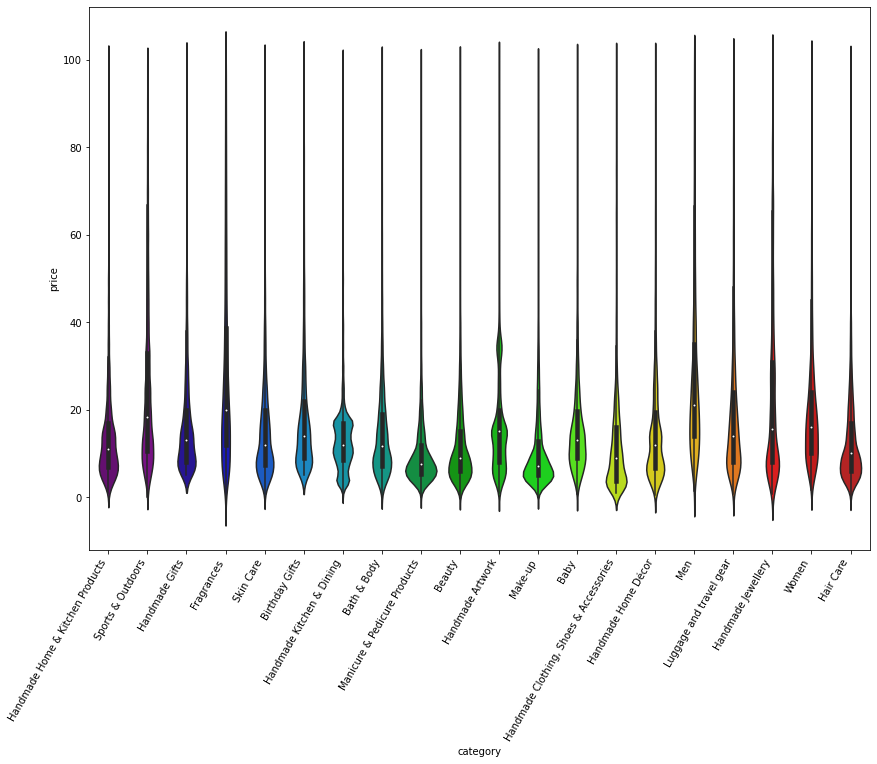

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(data=df_filtered, x='category', y='price', palette="nipy_spectral")
plt.xticks(rotation=60, ha='right') # thanks to ha no overlapping
plt.show()


In [18]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Baby'),
  Text(1, 0, 'Bath & Body'),
  Text(2, 0, 'Beauty'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Fragrances'),
  Text(5, 0, 'Hair Care'),
  Text(6, 0, 'Handmade Artwork'),
  Text(7, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(8, 0, 'Handmade Gifts'),
  Text(9, 0, 'Handmade Home & Kitchen Products'),
  Text(10, 0, 'Handmade Home Décor'),
  Text(11, 0, 'Handmade Jewellery'),
  Text(12, 0, 'Handmade Kitchen & Dining'),
  Text(13, 0, 'Luggage and travel gear'),
  Text(14, 0, 'Make-up'),
  Text(15, 0, 'Manicure & Pedicure Products'),
  Text(16, 0, 'Men'),
  Text(17, 0, 'Skin Care'),
  Text(18, 0, 'Sports & Outdoors'),
  Text(19, 0, 'Women')])

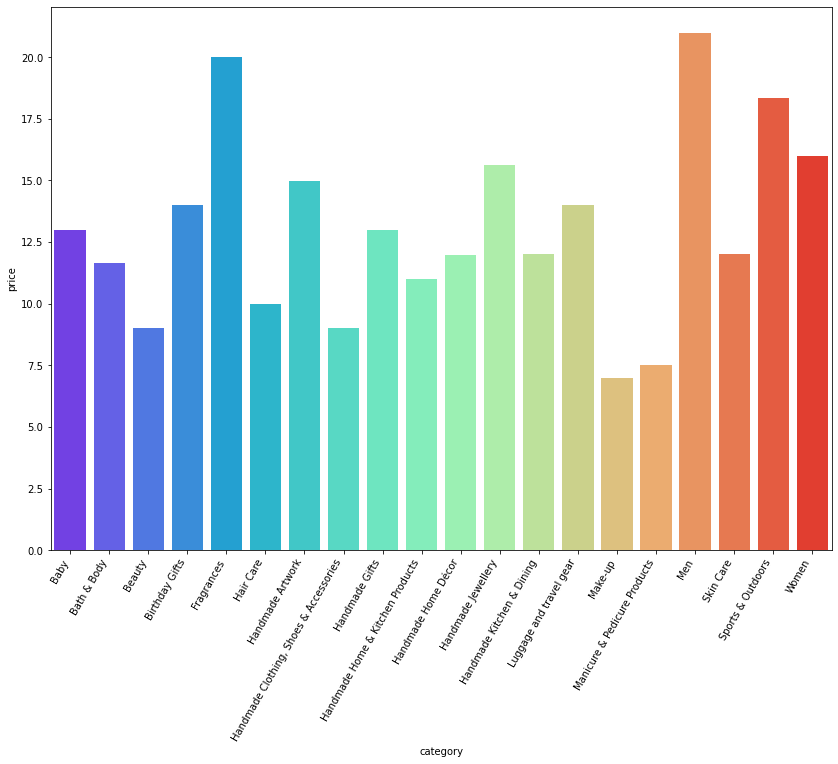

In [55]:
sns.barplot(data=grouped_df, x='category', y='price', palette="rainbow")
plt.xticks(rotation=60, ha = "right")

In [20]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Which category tends to receive the highest median rating from customers? 

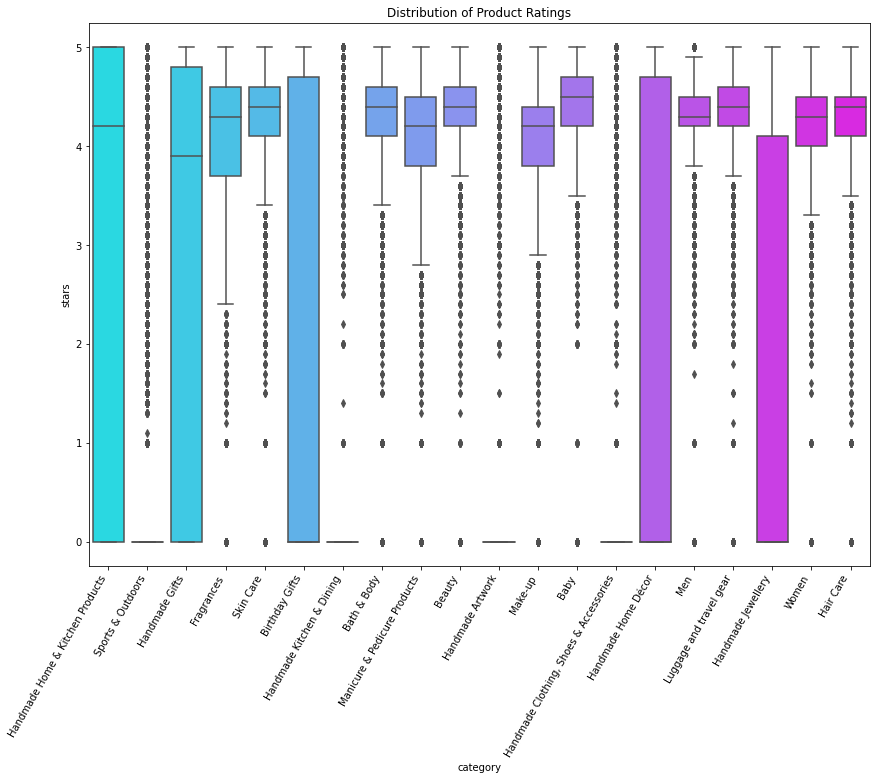

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(12, 8))  
sns.boxplot(data=df_filtered, x= 'category', y = 'stars' ,  palette="cool")
plt.xticks(rotation=60, ha = "right")
plt.title('Distribution of Product Ratings')
plt.show()

In [ ]:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

In [44]:
correlation = df_amazon['price'].corr(df_amazon['stars']).round(2)
correlation
# Pearson correlation, very little correlation

-0.12

In [45]:
correlation = df_amazon['price'].corr(df_amazon['stars'], method='spearman').round(2)
correlation
# Spearman correlation also very small

-0.13

In [ ]:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.


In [46]:
df_numerical = df_filtered.drop(['asin', 'title','category','uid', 'isBestSeller'], axis=1) # new df, drop columns that are not numerical
df_numerical

,stars,reviews,price,boughtInLastMonth
19513,4.5,763,7.99,900
19514,3.9,117,6.49,800
19515,4.6,1155,8.99,600
19516,4.5,56,4.99,500
19517,4.7,261,9.95,400
...,...,...,...,...
2429088,0.0,0,99.67,0
2429089,0.0,0,20.62,0
2429090,4.3,3,59.86,0
2437153,4.2,554,14.99,0


<AxesSubplot:xlabel='stars', ylabel='price'>

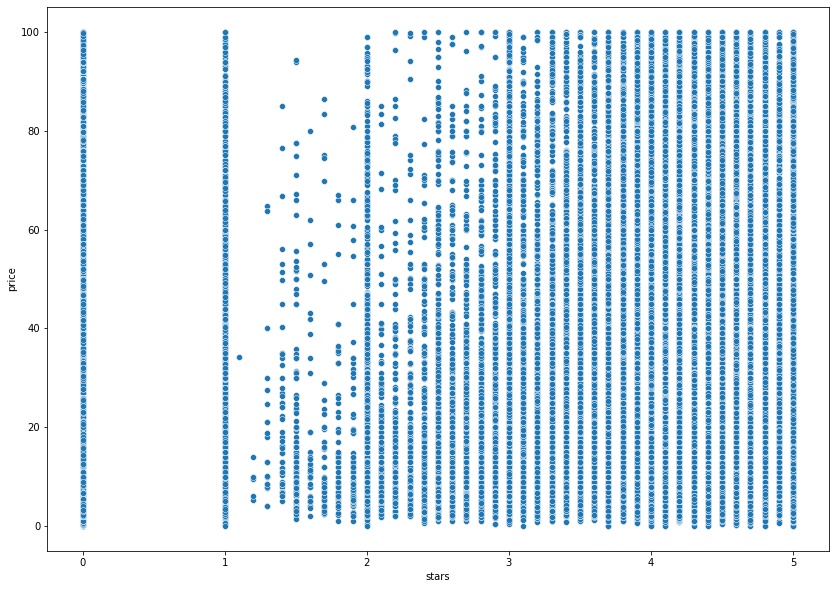

In [58]:
sns.scatterplot(data=df_numerical, x='stars', y='price')

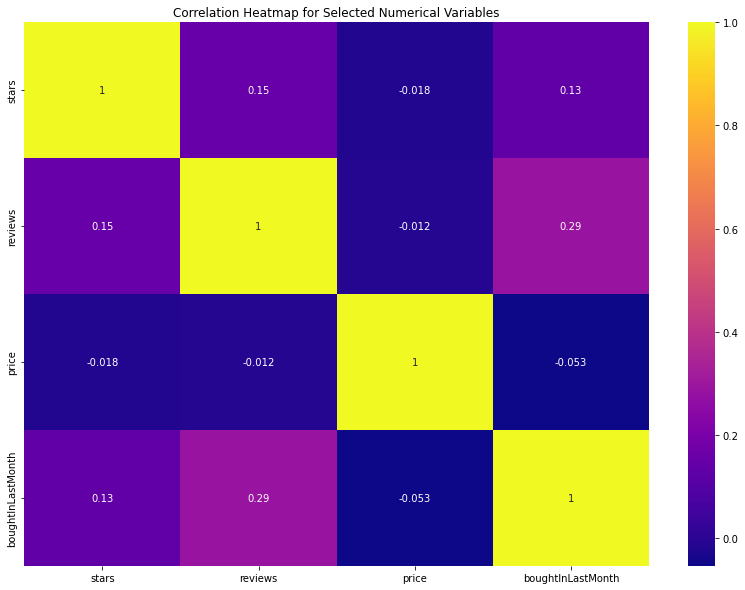

In [59]:
correlation_matrix = df_numerical.corr()
# Setting up the matplotlib figure size
# plt.figure(figsize=(12, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="plasma")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()